# Research about Automobile Insurance Claims

#### Assignment 4: 158.739 Introduction to Analytics
#### Student name: Fifi Zhang
#### Student ID: 23011135



## Executive Summary

The study focuses on two main aspects of research in the field of automobile insurance. The first aspect explores the relationship between client information, incident information, vehicle information, export amount and vehicle claim amount using various visualization methods such as heatmap, scatter plots and box plots and ANOVA statistic method to evaluate the statistical significance. Revealing relationships between client, incident, vehicle information and vehicle claim amount, while no relationship is found between the export amount and vehicle claim amount. In addressing the second aspect, the study utilizes Decision Tree, Logistic Regression, Neural Network and SVM algorithms to predict auto insurance claim fraud, with Logistic Regression identified as the most effective model. 


# 1. Introduction

The study aims to focus on two aspects of research. The first aspect is the relationship between client information, incident information, vehicle information, and the export amount and vehicle claim amount. The second aspect involves predicting auto insurance claim fraud. 

Since the amount of claim is relevant to a property insurance company’s claim costs and profits, it is crucial to research the claim amount relationship factors. Besides fraud detection can help to minimize insurance claim rates, it also becomes necessary to research the fraud prediction.

Artificial Neural Network (ANN), Decision Tree (DT), Logistic Regression classifiers, and SVM are commonly used machine learning methods to predict car insurance claims and fraud detection (Abdelhadi et al., 2005; Benedek et al., 2022). In this study, these four methods are used to conduct automobile insurance claim fraud.

There are six main sections in the essay. The first sections describe the research question, the importance of the questions, the literature review, and sections brief introduction. The second section is about data acquisition, three methods are applied namely downloading from Kaggle, web scraping, and web API. The third section is data integration, which aims to merge datasets obtained from the above resources. The fourth section is data wrangling, focusing on data cleaning, transformation, imputation, and EDA to make the dataset useful and get insights about the data patterns. The fifth section is the data analysis, which is the core part to analyze the research question. Finally, the conclusion section is made to show the key finding.


#### Datasets used:
1. insurance_claims

#### Dataset sources: https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data

### Research Questions

1. Research the relationship between client information, incident information, vehicle information, and the export amount and vehicle claim amount.
2. Predicting auto insurance claim fraud.


# 2. Data Acquire

Three data acquisition methods are used to research the vehicle claim amount relationship factors and auto insurance claim fraud detection, namely datasets from Kaggle, web scraping, and web API.  

Firstly, I download the available vehicle insurance claim dataset through Kaggle which consists of 40 variables and 1000 observations which is from a property insurance company in the USA in 2015. The variables include information regarding the client (i.e. age, months_as_customer, insured_sex, insured_education_level, insured occupation), policy (i.e. policy_number, policy_annual_premium, umbrella_limit), vehicle (i.e. auto_make, auto_model, auto_year), incident (i.e. incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicle_involved), and claim (i.e. total_claim_amount, property_claim, vehicle_claim, fraud_reported). 

What’s more, I perform web scraping techniques on the Yahoo auto website to obtain data in respect of auto model characteristics, such as curb weight, EPA total interior, fuel capacity, turning diameter, or overall length. 

Finally, I obtain the US monthly export amount in 2015 from the IMF (International Monetary Fund) API. 

Overall, different kinds of data acquisition techniques are deployed to obtain the research relating datasets.

In [596]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style>"))

In [2]:
# Create analysis environment, install libraries and import packages
!pip install pmdarima
!pip install missingno
!pip install lxml

# Python gets the webpages
import requests
from urllib.request import urlopen
# Creates structured, searchable object
from bs4 import BeautifulSoup  
import os
import math as m
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
from datetime import datetime
import datetime as dt
import sys
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
output_notebook()
from bokeh.layouts import gridplot
# Ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr
import pmdarima as pmd
from statsmodels.tsa.arima.model import ARIMA
import missingno as msno
from pylab import rcParams

%matplotlib inline
pd.set_option('display.max_columns', None)

Loading BokehJS ...

## 2.1 Download Dataset in Kaggle

In [3]:
#find dataset in Kaggle and import dataset 
df = pd.read_csv("/Users/Courses/158739_introduction_to_analytics/datasets/insurance_claims.csv")
print(f'shape of dataset : {df.shape}')
df

shape of dataset : (1000, 40)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [599]:
# Count the frequency of combinations of car brand and car model
frequency_counts = df.groupby(['auto_make', 'auto_model']).size().reset_index(name='count')

# Print the frequency counts
print(frequency_counts)

     auto_make      auto_model  count
0       Accura             MDX     36
1       Accura             RSX     12
2       Accura              TL     20
3         Audi              A3     37
4         Audi              A5     32
5          BMW        3 Series     18
6          BMW              M5     15
7          BMW              X5     23
8          BMW              X6     16
9    Chevrolet          Malibu     30
10   Chevrolet       Silverado     22
11   Chevrolet           Tahoe     24
12       Dodge            Neon     37
13       Dodge             RAM     43
14        Ford          Escape     24
15        Ford            F150     27
16        Ford          Fusion     21
17       Honda          Accord     13
18       Honda             CRV     20
19       Honda           Civic     22
20        Jeep  Grand Cherokee     25
21        Jeep        Wrangler     42
22    Mercedes            C300     18
23    Mercedes            E400     27
24    Mercedes           ML350     20
25      Niss

In [600]:
# check the range of 'policy_bind_date'
# Convert the date column to datetime format
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

# Extract the year from the dates
df['year'] = df['policy_bind_date'].dt.year

# Get the range of years
min_year = df['year'].min()
max_year = df['year'].max()

min_year,max_year

(1990, 2015)

In [601]:
# check the range of 'incident_date'
# Convert the date column to datetime format
df['incident_date'] = pd.to_datetime(df['incident_date'])

# Extract the year from the dates
df['inc_year'] = df['incident_date'].dt.year

# Get the range of years
min_inc_year = df['inc_year'].min()
max_inc_year = df['inc_year'].max()

min_inc_year ,max_inc_year

(2015, 2015)

## 2.2 web scraping

In [602]:
#using web scraping to acquire data
#GET Access the page and read it into the beautiful soup object
#ALWAYS FIRST MAKE SURE THAT THE RESPONSE IS 200 - OTHERWISE YOU MIGHT HAVE AN ERROR
url = "https://www.kbb.com/audi/a5/2015/"
response = requests.get(url) 
response

<Response [200]>

In [603]:
# 1.find audi a5 model data
# Use lxml to parse
soup = BeautifulSoup(response.text, 'lxml')

# Find the model table in the page
table = soup.find('table', attrs={'class': 'css-2a9fnn ee33uo30'})

# Convert the table into a DataFrame
df_audi_a5 = pd.read_html(str(table))


# Access the first DataFrame within the list
df_audi_a5 = df_audi_a5[0]

# Print the DataFrame
print(df_audi_a5)

# Check the type of the variable
print(type(df_audi_a5))


     0                                                  1             2   3
0  NaN  .css-z687n{margin:10px 24px 10px 0px;}Curb Weight     3682 lbs. NaN
1  NaN                                 EPA Total Interior   84.0 cu.ft. NaN
2  NaN                                      Fuel Capacity  16.1 gallons NaN
3  NaN                                    Front Head Room   37.5 inches NaN
4  NaN                                     Front Leg Room   41.3 inches NaN
5  NaN                               Max Seating Capacity             4 NaN
6  NaN                                     Overall Length  182.1 inches NaN
7  NaN                                Front Shoulder Room   54.3 inches NaN
8  NaN                            Trunk or Cargo Capacity   12.2 cu.ft. NaN
9  NaN                                   Turning Diameter     37.4 feet NaN
10 NaN                                         Wheel Base  108.3 inches NaN
11 NaN                                 Width with mirrors   79.5 inches NaN
<class 'pand

In [604]:
# clean the data
# Remove unwanted columns (columns 0 and 3)
df_cleaned = df_audi_a5.drop([0,3], axis=1)

# Remove unwanted text from column 1 using regular expressions
df_cleaned[2] = df_cleaned[2].replace(r'[^0-9.]', '', regex=True)

# Remove the final period from the 'text_column'
df_cleaned[2] = df_cleaned[2].str.rstrip('.')

# Remove unwanted portion from the values in column 1
df_cleaned[1]= df_cleaned[1].str.replace('.css-z687n{margin:10px 24px 10px 0px;}', '')
df_cleaned

,1,2
0,Curb Weight,3682
1,EPA Total Interior,84.0
2,Fuel Capacity,16.1
3,Front Head Room,37.5
4,Front Leg Room,41.3
5,Max Seating Capacity,4
6,Overall Length,182.1
7,Front Shoulder Room,54.3
8,Trunk or Cargo Capacity,12.2
9,Turning Diameter,37.4


In [605]:
# Transpose the columns into rows using the transpose() function
df_transposed_audi = df_cleaned.transpose()

# Set the first row as the new column index
df_transposed_audi.columns = df_transposed_audi.iloc[0]
df_transposed_audi = df_transposed_audi.iloc[1:]

df_transposed_audi

1,Curb Weight,EPA Total Interior,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Overall Length,Front Shoulder Room,Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Width with mirrors
2,3682,84.0,16.1,37.5,41.3,4,182.1,54.3,12.2,37.4,108.3,79.5


In [606]:
# Add new columns and assign values
df_transposed_audi['auto_make'] = 'Audi'
df_transposed_audi['auto_model'] = 'A5'
df_transposed_audi

1,Curb Weight,EPA Total Interior,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Overall Length,Front Shoulder Room,Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Width with mirrors,auto_make,auto_model
2,3682,84.0,16.1,37.5,41.3,4,182.1,54.3,12.2,37.4,108.3,79.5,Audi,A5


In [607]:
# 2.find ford escape model data
url = "https://www.kbb.com/ford/escape/2015/"
response = requests.get(url) 
response

<Response [200]>

In [608]:
# Use lxml to parse
soup = BeautifulSoup(response.text, 'lxml')

# Find the model table in the page
table = soup.find('table', attrs={'class': 'css-2a9fnn ee33uo30'})

# Convert the table into a DataFrame
df_ford_escape  = pd.read_html(str(table))

# Access the first DataFrame within the list
df_ford_escape = df_ford_escape[0]

# Print the DataFrame
print(df_ford_escape)

# Check the type of the variable
print(type(df_ford_escape))

     0                                                  1             2   3
0  NaN  .css-z687n{margin:10px 24px 10px 0px;}Curb Weight     3518 lbs. NaN
1  NaN                                      EPA Passenger   98.1 cu.ft. NaN
2  NaN                                 EPA Total Interior  132.4 cu.ft. NaN
3  NaN                                      Fuel Capacity  15.1 gallons NaN
4  NaN                                    Front Head Room   39.9 inches NaN
5  NaN                                     Front Leg Room   43.1 inches NaN
6  NaN                               Max Seating Capacity             5 NaN
7  NaN                           Minimum Ground Clearance    7.9 inches NaN
8  NaN                                     Overall Length  178.1 inches NaN
9  NaN                                Front Shoulder Room   56.0 inches NaN
10 NaN                           Towing Capacity, Maximum     1500 lbs. NaN
11 NaN                            Trunk or Cargo Capacity   67.8 cu.ft. NaN
12 NaN      

In [609]:
# clean the data
# Remove unwanted columns (columns 0 and 3)
df_cleaned = df_ford_escape.drop([0,3], axis=1)

# Remove unwanted text from column 1 using regular expressions
df_cleaned[2] = df_cleaned[2].replace(r'[^0-9.]', '', regex=True)

# Remove the final period from the 'text_column'
df_cleaned[2] = df_cleaned[2].str.rstrip('.')

# Remove unwanted portion from the values in column 1
df_cleaned[1]= df_cleaned[1].str.replace('.css-z687n{margin:10px 24px 10px 0px;}', '')
df_cleaned

,1,2
0,Curb Weight,3518
1,EPA Passenger,98.1
2,EPA Total Interior,132.4
3,Fuel Capacity,15.1
4,Front Head Room,39.9
5,Front Leg Room,43.1
6,Max Seating Capacity,5
7,Minimum Ground Clearance,7.9
8,Overall Length,178.1
9,Front Shoulder Room,56.0


In [610]:
# Transpose the columns into rows using the transpose() function
df_transposed_ford = df_cleaned.transpose()

# Set the first row as the new column index
df_transposed_ford.columns = df_transposed_ford.iloc[0]
df_transposed_ford = df_transposed_ford.iloc[1:]

df_transposed_ford

1,Curb Weight,EPA Passenger,EPA Total Interior,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Minimum Ground Clearance,Overall Length,Front Shoulder Room,"Towing Capacity, Maximum",Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Gross Vehicle Weight Rating (GVWR),Width with mirrors
2,3518,98.1,132.4,15.1,39.9,43.1,5,7.9,178.1,56.0,1500,67.8,38.8,105.9,4320,81.8


In [611]:
# Add new columns and assign values
df_transposed_ford['auto_make'] = 'Ford'
df_transposed_ford['auto_model'] = 'Escape'
df_transposed_ford

1,Curb Weight,EPA Passenger,EPA Total Interior,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Minimum Ground Clearance,Overall Length,Front Shoulder Room,"Towing Capacity, Maximum",Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Gross Vehicle Weight Rating (GVWR),Width with mirrors,auto_make,auto_model
2,3518,98.1,132.4,15.1,39.9,43.1,5,7.9,178.1,56.0,1500,67.8,38.8,105.9,4320,81.8,Ford,Escape


In [612]:
#3.find chevrolet model data
url = "https://www.kbb.com/chevrolet/trax/2015/"
response = requests.get(url) 
response

<Response [200]>

In [613]:
# Use lxml to parse
soup = BeautifulSoup(response.text, 'lxml')

# Find the model table in the page
table = soup.find('table', attrs={'class': 'css-1bdywq1 ee33uo30'})

# Convert the table into a DataFrame
df_chev = pd.read_html(str(table))


# Access the first DataFrame within the list
df_chev = df_chev[0]

# Print the DataFrame
print(df_chev)

# Check the type of the variable
print(type(df_chev))


     0                                                  1             2   3
0  NaN  .css-z687n{margin:10px 24px 10px 0px;}Curb Weight     2805 lbs. NaN
1  NaN                                      EPA Passenger   92.8 cu.ft. NaN
2  NaN                                      Fuel Capacity  14.0 gallons NaN
3  NaN                                    Front Head Room   39.6 inches NaN
4  NaN                                     Front Leg Room   40.8 inches NaN
5  NaN                               Max Seating Capacity             5 NaN
6  NaN                           Minimum Ground Clearance    6.2 inches NaN
7  NaN                                     Overall Length  168.5 inches NaN
8  NaN                                Front Shoulder Room   54.1 inches NaN
9  NaN                            Trunk or Cargo Capacity   48.4 cu.ft. NaN
10 NaN                                   Turning Diameter     36.7 feet NaN
11 NaN                                         Wheel Base  100.6 inches NaN
12 NaN      

In [614]:
# clean the data
# Remove unwanted columns (columns 0 and 3)
df_cleaned = df_chev.drop([0,3], axis=1)

# Remove unwanted text from column 1 using regular expressions
df_cleaned[2] = df_cleaned[2].replace(r'[^0-9.]', '', regex=True)

# Remove the final period from the 'text_column'
df_cleaned[2] = df_cleaned[2].str.rstrip('.')

# Remove unwanted portion from the values in column 1
df_cleaned[1]= df_cleaned[1].str.replace('.css-z687n{margin:10px 24px 10px 0px;}', '')
df_cleaned

,1,2
0,Curb Weight,2805
1,EPA Passenger,92.8
2,Fuel Capacity,14.0
3,Front Head Room,39.6
4,Front Leg Room,40.8
5,Max Seating Capacity,5
6,Minimum Ground Clearance,6.2
7,Overall Length,168.5
8,Front Shoulder Room,54.1
9,Trunk or Cargo Capacity,48.4


In [615]:
# Transpose the columns into rows using the transpose() function
df_transposed_chevrolet = df_cleaned.transpose()

# Set the first row as the new column index
df_transposed_chevrolet.columns = df_transposed_chevrolet.iloc[0]
df_transposed_chevrolet = df_transposed_chevrolet.iloc[1:]

df_transposed_chevrolet

1,Curb Weight,EPA Passenger,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Minimum Ground Clearance,Overall Length,Front Shoulder Room,Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Width with mirrors
2,2805,92.8,14.0,39.6,40.8,5,6.2,168.5,54.1,48.4,36.7,100.6,69.9


In [616]:
# Add new columns and assign values
df_transposed_chevrolet['auto_make'] = 'Chevrolet'
df_transposed_chevrolet['auto_model'] = 'Silverado'
df_transposed_chevrolet

1,Curb Weight,EPA Passenger,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Minimum Ground Clearance,Overall Length,Front Shoulder Room,Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Width with mirrors,auto_make,auto_model
2,2805,92.8,14.0,39.6,40.8,5,6.2,168.5,54.1,48.4,36.7,100.6,69.9,Chevrolet,Silverado


In [617]:
#4.find honda model data
url = "https://www.kbb.com/honda/civic/2015/"
response = requests.get(url) 
response

<Response [200]>

In [618]:
# Use lxml to parse
soup = BeautifulSoup(response.text, 'lxml')

# Find the model table in the page
table = soup.find('table', attrs={'class': 'css-2a9fnn ee33uo30'})

# Convert the table into a DataFrame
df_honda = pd.read_html(str(table))


# Access the first DataFrame within the list
df_honda = df_honda[0]

# Print the DataFrame
print(df_honda)

# Check the type of the variable
print(type(df_honda))


     0                                                  1             2   3
0  NaN  .css-z687n{margin:10px 24px 10px 0px;}Curb Weight     2749 lbs. NaN
1  NaN                                      EPA Passenger   94.6 cu.ft. NaN
2  NaN                                      Fuel Capacity  13.2 gallons NaN
3  NaN                                    Front Head Room   39.0 inches NaN
4  NaN                                     Front Leg Room   42.0 inches NaN
5  NaN                               Max Seating Capacity             5 NaN
6  NaN                                     Overall Length  179.4 inches NaN
7  NaN                                Front Shoulder Room   56.6 inches NaN
8  NaN                            Trunk or Cargo Capacity   12.5 cu.ft. NaN
9  NaN                                   Turning Diameter     35.4 feet NaN
10 NaN                                         Wheel Base  105.1 inches NaN
11 NaN                                 Width with mirrors   69.0 inches NaN
<class 'pand

In [619]:
# clean the data
# Remove unwanted columns (columns 0 and 3)
df_cleaned = df_honda.drop([0,3], axis=1)

# Remove unwanted text from column 1 using regular expressions
df_cleaned[2] = df_cleaned[2].replace(r'[^0-9.]', '', regex=True)

# Remove the final period from the 'text_column'
df_cleaned[2] = df_cleaned[2].str.rstrip('.')

# Remove unwanted portion from the values in column 1
df_cleaned[1]= df_cleaned[1].str.replace('.css-z687n{margin:10px 24px 10px 0px;}', '')
df_cleaned

,1,2
0,Curb Weight,2749
1,EPA Passenger,94.6
2,Fuel Capacity,13.2
3,Front Head Room,39.0
4,Front Leg Room,42.0
5,Max Seating Capacity,5
6,Overall Length,179.4
7,Front Shoulder Room,56.6
8,Trunk or Cargo Capacity,12.5
9,Turning Diameter,35.4


In [620]:
# Transpose the columns into rows using the transpose() function
df_transposed_honda = df_cleaned.transpose()

# Set the first row as the new column index
df_transposed_honda.columns = df_transposed_honda.iloc[0]
df_transposed_honda = df_transposed_honda.iloc[1:]

df_transposed_honda

1,Curb Weight,EPA Passenger,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Overall Length,Front Shoulder Room,Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Width with mirrors
2,2749,94.6,13.2,39.0,42.0,5,179.4,56.6,12.5,35.4,105.1,69.0


In [621]:
# Add new columns and assign values
df_transposed_honda['auto_make'] = 'Honda'
df_transposed_honda['auto_model'] = 'Civic'
df_transposed_honda

1,Curb Weight,EPA Passenger,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Overall Length,Front Shoulder Room,Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Width with mirrors,auto_make,auto_model
2,2749,94.6,13.2,39.0,42.0,5,179.4,56.6,12.5,35.4,105.1,69.0,Honda,Civic


In [622]:
# Merge the four car model DataFrames using an inner join
merged_df = pd.merge(df_transposed_audi, df_transposed_ford, on=None, how='outer')
merged_df = pd.merge(merged_df, df_transposed_honda, on=None, how='outer')
merged_df = pd.merge(merged_df, df_transposed_chevrolet, on=None, how='outer')
merged_df 

1,Curb Weight,EPA Total Interior,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Overall Length,Front Shoulder Room,Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Width with mirrors,auto_make,auto_model,EPA Passenger,Minimum Ground Clearance,"Towing Capacity, Maximum",Gross Vehicle Weight Rating (GVWR)
0,3682,84.0,16.1,37.5,41.3,4,182.1,54.3,12.2,37.4,108.3,79.5,Audi,A5,NaN,NaN,NaN,NaN
1,3518,132.4,15.1,39.9,43.1,5,178.1,56.0,67.8,38.8,105.9,81.8,Ford,Escape,98.1,7.9,1500,4320
2,2749,NaN,13.2,39.0,42.0,5,179.4,56.6,12.5,35.4,105.1,69.0,Honda,Civic,94.6,NaN,NaN,NaN
3,2805,NaN,14.0,39.6,40.8,5,168.5,54.1,48.4,36.7,100.6,69.9,Chevrolet,Silverado,92.8,6.2,NaN,NaN


## 2.3 web API

In [626]:
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/DOT/M.US.TXG_FOB_USD.W00.?startPeriod=2015&endPeriod=2015'
response = requests.get(url)
print(response)
result = response.content
result = json.loads(result)
result

<Response [200]>


{'CompactData': {'@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
  '@xmlns:xsd': 'http://www.w3.org/2001/XMLSchema',
  '@xsi:schemaLocation': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message https://registry.sdmx.org/schemas/v2_0/SDMXMessage.xsd http://dataservices.imf.org/compact/DOT http://dataservices.imf.org/compact/DOT.xsd',
  '@xmlns': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
  'Header': {'ID': 'ac3fa2d0-ed54-42ef-9208-d7a88e6c63b7',
   'Test': 'false',
   'Prepared': '2023-05-27T18:11:59',
   'Sender': {'@id': '1C0',
    'Name': {'@xml:lang': 'en', '#text': 'IMF'},
    'Contact': {'URI': 'http://www.imf.org',
     'Telephone': '+ 1 (202) 623-6220'}},
   'Receiver': {'@id': 'ZZZ'},
   'DataSetID': 'DOT'},
  'DataSet': {'@xmlns': 'http://dataservices.imf.org/compact/DOT',
   'Series': {'@FREQ': 'M',
    '@REF_AREA': 'US',
    '@INDICATOR': 'TXG_FOB_USD',
    '@COUNTERPART_AREA': 'W00',
    '@UNIT_MULT': '6',
    '@TIME_FORMAT': 'P1M',
    '

In [627]:
result['CompactData']['DataSet']['Series']['Obs']

[{'@TIME_PERIOD': '2015-01', '@OBS_VALUE': '121422.05853'},
 {'@TIME_PERIOD': '2015-02', '@OBS_VALUE': '118221.238593'},
 {'@TIME_PERIOD': '2015-03', '@OBS_VALUE': '133187.087866'},
 {'@TIME_PERIOD': '2015-04', '@OBS_VALUE': '128151.795336'},
 {'@TIME_PERIOD': '2015-05', '@OBS_VALUE': '128112.915487'},
 {'@TIME_PERIOD': '2015-06', '@OBS_VALUE': '130933.092082'},
 {'@TIME_PERIOD': '2015-07', '@OBS_VALUE': '124088.285946'},
 {'@TIME_PERIOD': '2015-08', '@OBS_VALUE': '123000.620909'},
 {'@TIME_PERIOD': '2015-09', '@OBS_VALUE': '125337.00952'},
 {'@TIME_PERIOD': '2015-10', '@OBS_VALUE': '130491.249312'},
 {'@TIME_PERIOD': '2015-11', '@OBS_VALUE': '120592.707532'},
 {'@TIME_PERIOD': '2015-12', '@OBS_VALUE': '119798.968306'}]

In [628]:
usexp = pd.DataFrame.from_dict(result['CompactData']['DataSet']['Series']['Obs'])
usexp.columns = ['month', 'usexports'];
usexp

,month,usexports
0,2015-01,121422.05853
1,2015-02,118221.238593
2,2015-03,133187.087866
3,2015-04,128151.795336
4,2015-05,128112.915487
5,2015-06,130933.092082
6,2015-07,124088.285946
7,2015-08,123000.620909
8,2015-09,125337.00952
9,2015-10,130491.249312


# 3. Data Integration

Three datasets obtained from the above resources are merged in two steps. 

At first, I merge the original Kaggle dataset with Yahoo auto model data on the “auto_make” and “auto_model” variables. 

Then, I join the merged dataset with the US exports dataset on the “month” variable after extracting “month” from “incident_date” and transforming the datatype into date time.  

As a result, I get a dataset with 60 variables and 1000 observations.

In [629]:
# Merge the auto model data with original data
merged_df_model = pd.merge( df , merged_df, on=['auto_make','auto_model'], how='left' )
merged_df_model

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,year,inc_year,Curb Weight,EPA Total Interior,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Overall Length,Front Shoulder Room,Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Width with mirrors,EPA Passenger,Minimum Ground Clearance,"Towing Capacity, Maximum",Gross Vehicle Weight Rating (GVWR)
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,2014,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,2006,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN,2000,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,1990,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN,2014,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN,1991,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN,2014,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN,2003,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,4

In [630]:
# Merge usexp with former merged data frame
# Convert 'incident_date' column in merged_df_model to datetime
merged_df_model['incident_date'] = pd.to_datetime(merged_df_model['incident_date'])

# Extract month from 'incident_date' column
merged_df_model['month'] = merged_df_model['incident_date'].dt.to_period('M')

# Convert 'month' column in usexp to datetime
usexp['month'] = pd.to_datetime(usexp['month'])

# Extract month from 'month' column
usexp['month'] = usexp['month'].dt.to_period('M')

# merge usexp with former merged data frame
df = pd.merge(merged_df_model, usexp, on='month', how = 'left')

# Print the merged DataFrame
df


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,year,inc_year,Curb Weight,EPA Total Interior,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Overall Length,Front Shoulder Room,Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Width with mirrors,EPA Passenger,Minimum Ground Clearance,"Towing Capacity, Maximum",Gross Vehicle Weight Rating (GVWR),month,usexports
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN,2014,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01,121422.05853
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN,2006,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01,121422.05853
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN,2000,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02,118221.238593
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,1990,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01,121422.05853
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN,2014,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02,118221.238593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN,1991,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02,118221.238593
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN,2014,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01,121422.05853
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,

# 4. Data Wrangling 

In this section, data cleaning is conducted to enable the dataset applicable for analysis and EDA is applied to get insights into data patterns. 

## 4.1 Data Clean

In data cleaning, I mainly clean the data and deploy data imputation. 

First, I replace all the “?” with null values. 

Then I find that all the missing values are from categorical variables, so I impute the missing data with the most frequently occurring value. 

Lastly, according to the heatmap and the number of unique values of all the variables, 10 variables are dropped including “policy_bind_date” “policy_csl”, “policy_state”, “insured_zip”, “incident_location”, “incident_date”, “insured_hobbies”, “authorities_contacted”, “month”, “year”.

In [631]:
df = df.replace("?", np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   months_as_customer                  1000 non-null   int64         
 1   age                                 1000 non-null   int64         
 2   policy_number                       1000 non-null   int64         
 3   policy_bind_date                    1000 non-null   datetime64[ns]
 4   policy_state                        1000 non-null   object        
 5   policy_csl                          1000 non-null   object        
 6   policy_deductable                   1000 non-null   int64         
 7   policy_annual_premium               1000 non-null   float64       
 8   umbrella_limit                      1000 non-null   int64         
 9   insured_zip                         1000 non-null   int64         
 10  insured_sex              

In [632]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [633]:
# missing values
df.isna().sum() / len(df) * 100

months_as_customer                      0.0
age                                     0.0
policy_number                           0.0
policy_bind_date                        0.0
policy_state                            0.0
policy_csl                              0.0
policy_deductable                       0.0
policy_annual_premium                   0.0
umbrella_limit                          0.0
insured_zip                             0.0
insured_sex                             0.0
insured_education_level                 0.0
insured_occupation                      0.0
insured_hobbies                         0.0
insured_relationship                    0.0
capital-gains                           0.0
capital-loss                            0.0
incident_date                           0.0
incident_type                           0.0
collision_type                         17.8
incident_severity                       0.0
authorities_contacted                   0.0
incident_state                  

In [634]:
# fill the object variables' missing value with mode value
# Iterate over each column
for column in df.select_dtypes(include='object'):
    # Calculate the mode value
    mode_value = df[column].mode()[0]
    # Fill the missing values with the mode value
    df[column] = df[column].fillna(mode_value)
    

In [635]:
df.isna().sum()

months_as_customer                       0
age                                      0
policy_number                            0
policy_bind_date                         0
policy_state                             0
policy_csl                               0
policy_deductable                        0
policy_annual_premium                    0
umbrella_limit                           0
insured_zip                              0
insured_sex                              0
insured_education_level                  0
insured_occupation                       0
insured_hobbies                          0
insured_relationship                     0
capital-gains                            0
capital-loss                             0
incident_date                            0
incident_type                            0
collision_type                           0
incident_severity                        0
authorities_contacted                    0
incident_state                           0
incident_ci

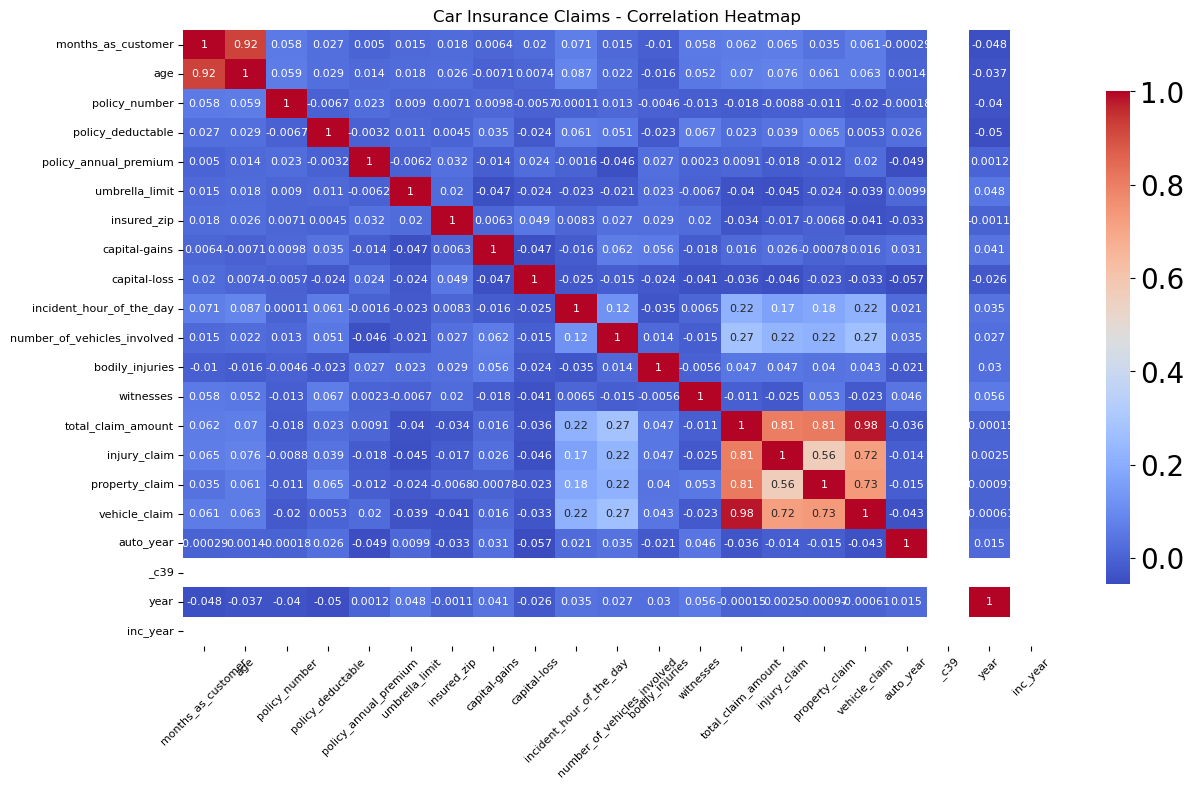

In [636]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(14, 8))  # Set the figure size
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, annot_kws={"fontsize": 8} ,cbar_kws={"shrink": 0.8})  # Set annotation font size

plt.title('Car Insurance Claims - Correlation Heatmap', fontsize=12)  # Set the title font size
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels and set font size
plt.yticks(fontsize=8)  # Set y-axis labels font size

# Set the colorbar label font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

plt.show()  # Show the heatmap


Fig1: car insurance claim heatmap

In [637]:
df.nunique()

months_as_customer                     391
age                                     46
policy_number                         1000
policy_bind_date                       951
policy_state                             3
policy_csl                               3
policy_deductable                        3
policy_annual_premium                  991
umbrella_limit                          11
insured_zip                            995
insured_sex                              2
insured_education_level                  7
insured_occupation                      14
insured_hobbies                         20
insured_relationship                     6
capital-gains                          338
capital-loss                           354
incident_date                           60
incident_type                            4
collision_type                           3
incident_severity                        4
authorities_contacted                    5
incident_state                           7
incident_ci

In [638]:
# dropping columns which are not necessary for analysis and prediction

to_drop = ['policy_bind_date','policy_csl','policy_state','insured_zip','incident_location','incident_date',
    'insured_hobbies','authorities_contacted','month','year', 'inc_year','_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [639]:
print(f'shape of dataset: {df.shape}')
df.head()

shape of dataset: (1000, 47)


,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Curb Weight,EPA Total Interior,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Overall Length,Front Shoulder Room,Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Width with mirrors,EPA Passenger,Minimum Ground Clearance,"Towing Capacity, Maximum",Gross Vehicle Weight Rating (GVWR),usexports
0,328,48,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,3682,84.0,16.1,37.5,41.3,5,182.1,54.3,12.2,37.4,108.3,79.5,98.1,7.9,1500,4320,121422.05853
1,228,42,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,3682,84.0,16.1,37.5,41.3,5,182.1,54.3,12.2,37.4,108.3,79.5,98.1,7.9,1500,4320,121422.05853
2,134,29,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,3682,84.0,16.1,37.5,41.3,5,182.1,54.3,12.2,37.4,108.3,79.5,98.1,7.9,1500,4320,118221.238593
3,256,41,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,3682,84.0,16.1,37.5,41.3,5,182.1,54.3,12.2,37.4,108.3,79.5,98.1,7.9,1500,4320,121422.05853
4,228,44,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,3682,84.0,16.1,37.5,41.3,5,182.1,54.3,12.2,37.4,108.3,79.5,98.1,7.9,1500,4320,118221.238593


## 4.2 EDA/Data Visulisation

Three different kinds of visualization methods are used in EDA section, namely histograms, multicollinear heatmap, and scatter plots.

Firstly, histograms are used to see the distribution of the variables.  We can see that month_as_customer, age, policy_annual_premium, total_claim_amount almost show a normal distribution without skewness.

Next, the correlation matrix of the heatmap is used to find the relationship between numerical variables. It indicates that “months_as_customer” and “age” are highly positively correlated with each other. What’s more, “total_claim_amount”, “vehicle_amount”, “property_amount”, and “injury_amount” are also highly positively correlated since the total claim amount is the aggregate value of the other three. So, the “age” and “total_claim_amount” variables are dropped.  

Finally, a scatter plot is drawn to explore the relationship between vehicle-related variables, export amount, and auto claim amounts. It shows that there is no relationship between these variables probably due to the unabundant data of vehicle characteristics and exports. Therefore, these vehicle-related variables and exports are dropped. 


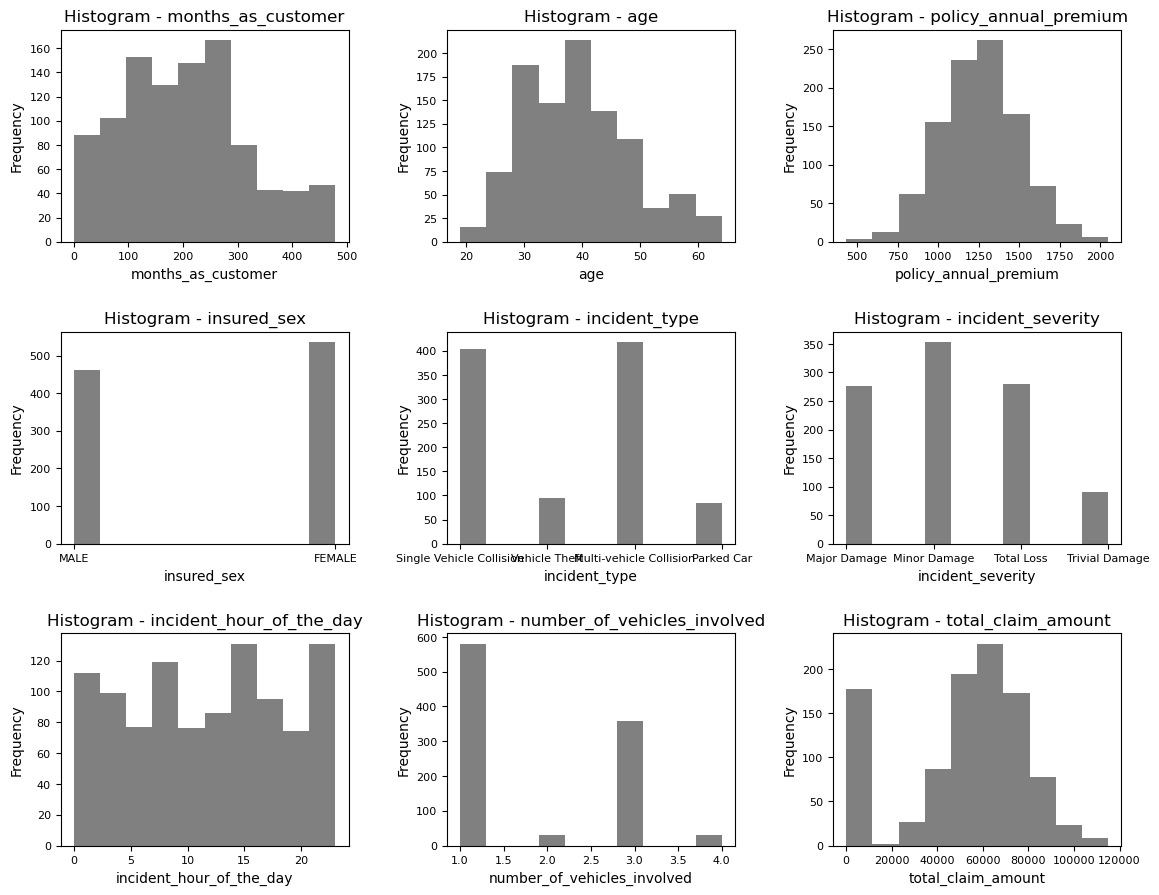

In [640]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 15))

# List of variable names
variables = ['months_as_customer', 'age', 'policy_annual_premium', 'insured_sex',
              'incident_type', 'incident_severity', 'incident_hour_of_the_day',
             'number_of_vehicles_involved', 'total_claim_amount']

# Plot histograms for each variable
for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3

    axes[row, col].hist(df[variable], bins=10, color='gray')  # Set histogram color to gray
    axes[row, col].set_xlabel(variable, fontsize=10)  # Set x-axis label and its font size
    axes[row, col].set_ylabel('Frequency', fontsize=10)  # Set y-axis label and its font size
    axes[row, col].set_title(f'Histogram - {variable}', fontsize=12)  # Set title and its font size

    # Set tick label font size for both axes
    axes[row, col].tick_params(axis='both', labelsize=8)

# Remove empty subplots
for i in range(len(variables), 5*3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Fig2: distributions of certain variables

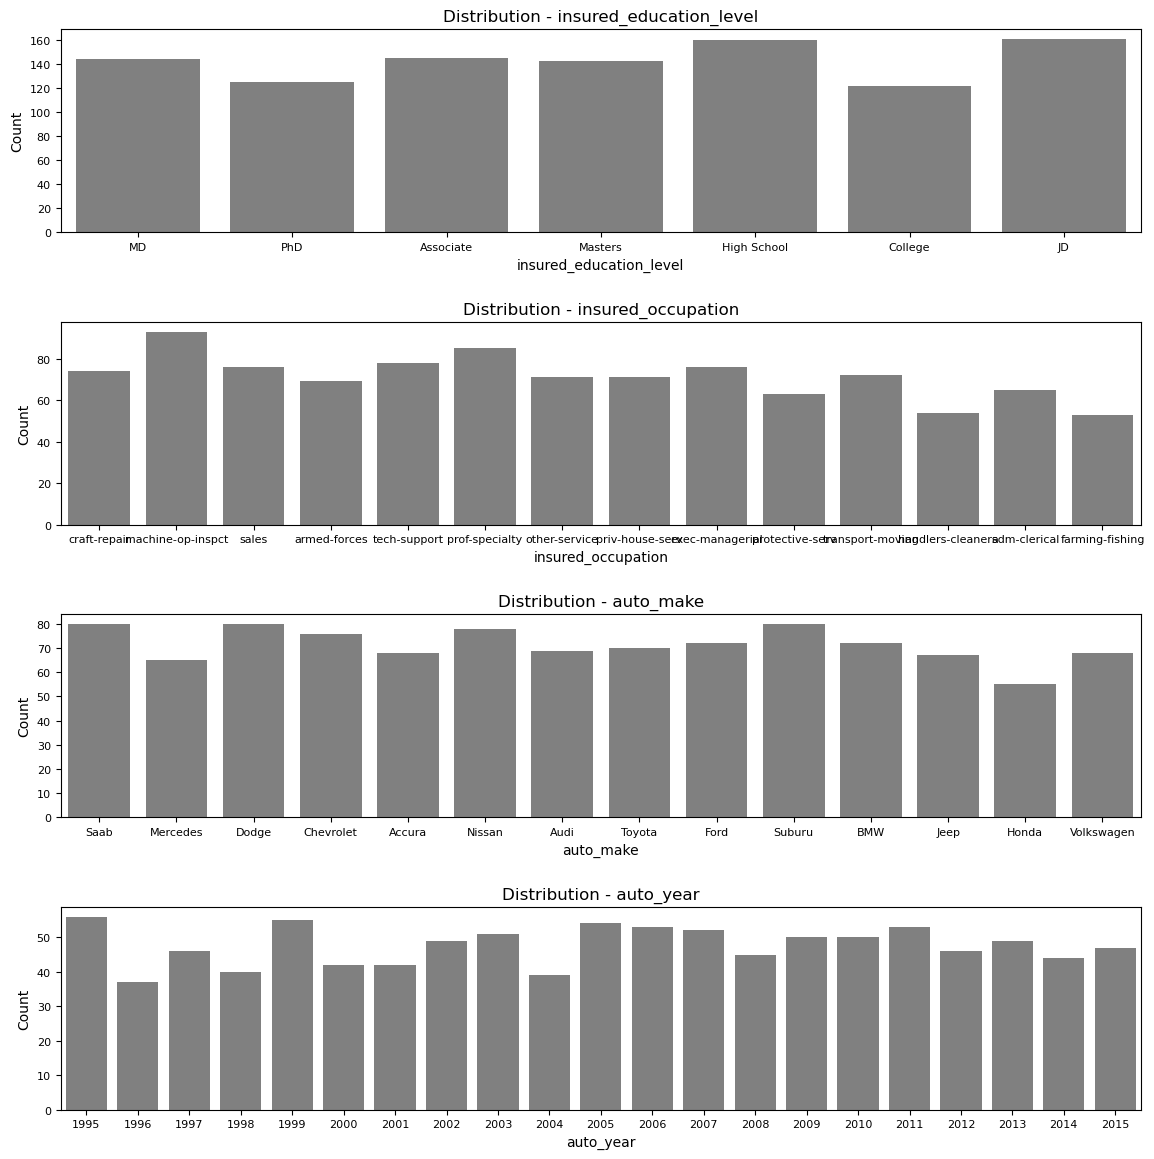

In [641]:
# Create subplots with adjusted figure size
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))

# List of variable names
variables = ['insured_education_level', 'insured_occupation', 'auto_make', 'auto_year']

# Plot distributions for each variable
for i, variable in enumerate(variables):
    sns.countplot(data=df, x=variable, color='gray', ax=axes[i])  # Use countplot for categorical variables
    axes[i].set_xlabel(variable, fontsize=10)  # Set x-axis label and its font size
    axes[i].set_ylabel('Count', fontsize=10)  # Set y-axis label and its font size
    axes[i].set_title(f'Distribution - {variable}', fontsize=12)  # Set title and its font size

    # Set tick label font size for both axes
    axes[i].tick_params(axis='both', labelsize=8)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Fig3: distributions of insured occupation, auto make and auto year

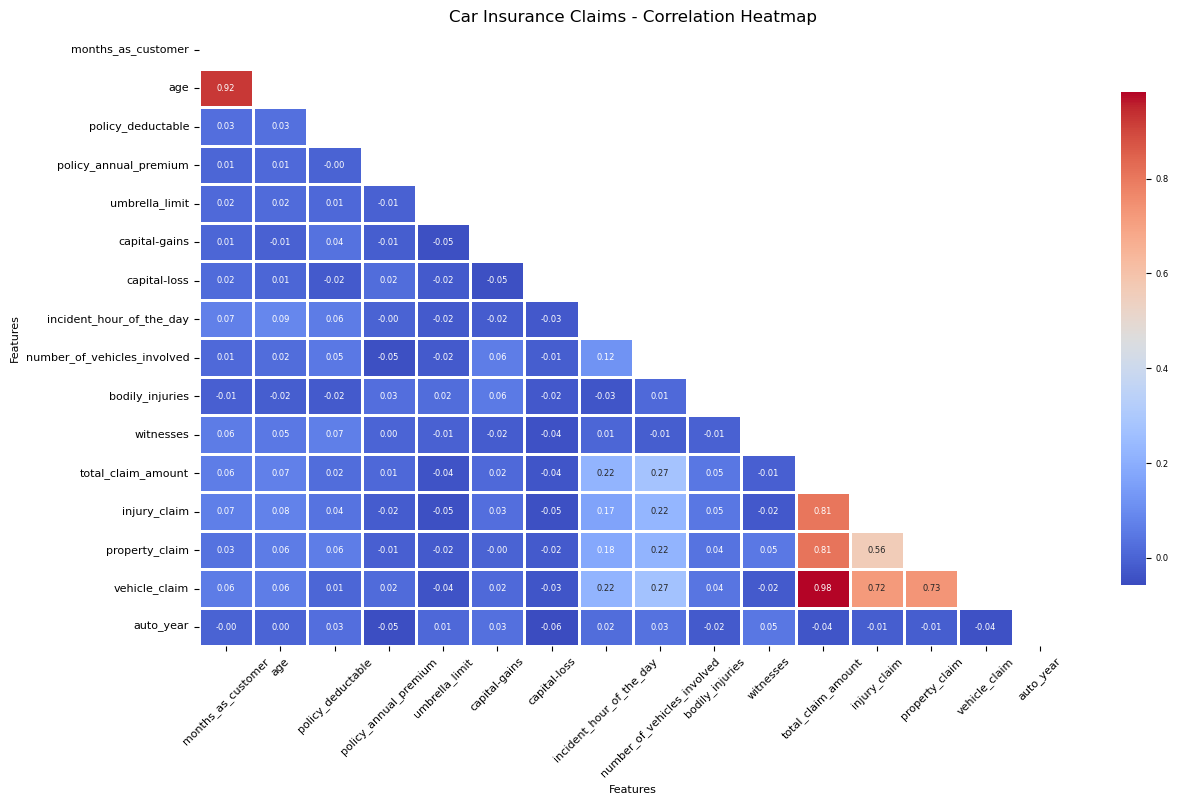

In [642]:
# checking for multicollinearity
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure and axes
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Create the heatmap
heatmap = sns.heatmap(data=correlation_matrix, cmap="coolwarm", annot=True, annot_kws={"fontsize": 6}, mask=mask, linewidths=1, fmt=".2f", ax=ax,cbar_kws={"shrink": 0.8})

# Set the title and axis labels
plt.title('Car Insurance Claims - Correlation Heatmap', fontsize=12)
plt.xlabel('Features', fontsize=8)
plt.ylabel('Features', fontsize=8)

# Rotate x-axis labels and set font size
plt.xticks(rotation=45, fontsize=8)
# Set y-axis labels font size
plt.yticks(fontsize=8)

# Set the colorbar label font size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

plt.show()

Fig4: multicollinearity heatmap

In [643]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)
df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Curb Weight,EPA Total Interior,Fuel Capacity,Front Head Room,Front Leg Room,Max Seating Capacity,Overall Length,Front Shoulder Room,Trunk or Cargo Capacity,Turning Diameter,Wheel Base,Width with mirrors,EPA Passenger,Minimum Ground Clearance,"Towing Capacity, Maximum",Gross Vehicle Weight Rating (GVWR),usexports
0,328,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,SC,Columbus,5,1,YES,1,2,YES,6510,13020,52080,Saab,92x,2004,Y,3682,84.0,16.1,37.5,41.3,5,182.1,54.3,12.2,37.4,108.3,79.5,98.1,7.9,1500,4320,121422.05853
1,228,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,VA,Riverwood,8,1,NO,0,0,NO,780,780,3510,Mercedes,E400,2007,Y,3682,84.0,16.1,37.5,41.3,5,182.1,54.3,12.2,37.4,108.3,79.5,98.1,7.9,1500,4320,121422.05853
2,134,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,NY,Columbus,7,3,NO,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N,3682,84.0,16.1,37.5,41.3,5,182.1,54.3,12.2,37.4,108.3,79.5,98.1,7.9,1500,4320,118221.238593
3,256,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,OH,Arlington,5,1,NO,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y,3682,84.0,16.1,37.5,41.3,5,182.1,54.3,12.2,37.4,108.3,79.5,98.1,7.9,1500,4320,121422.05853
4,228,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,NY,Arlington,20,1,NO,0,1,NO,1300,650,4550,Accura,RSX,2009,N,3682,84.0,16.1,37.5,41.3,5,182.1,54.3,12.2,37.4,108.3,79.5,98.1,7.9,1500,4320,118221.238593


In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   months_as_customer                  1000 non-null   int64  
 1   policy_deductable                   1000 non-null   int64  
 2   policy_annual_premium               1000 non-null   float64
 3   umbrella_limit                      1000 non-null   int64  
 4   insured_sex                         1000 non-null   object 
 5   insured_education_level             1000 non-null   object 
 6   insured_occupation                  1000 non-null   object 
 7   insured_relationship                1000 non-null   object 
 8   capital-gains                       1000 non-null   int64  
 9   capital-loss                        1000 non-null   int64  
 10  incident_type                       1000 non-null   object 
 11  collision_type                      1000 non

In [645]:
# adjust car model variables to see the relationship between car model or usexports and claim amount
# Choose the Columns of car model and usexports
columns_to_convert = df.columns[28:45]  

# Convert object variables to float
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Verify the updated data types
print(df.dtypes)

months_as_customer                      int64
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_type                          object
collision_type                         object
incident_severity                      object
incident_state                         object
incident_city                          object
incident_hour_of_the_day                int64
number_of_vehicles_involved             int64
property_damage                        object
bodily_injuries                         int64
witnesses                               int64
police_report_available                object
injury_claim                      

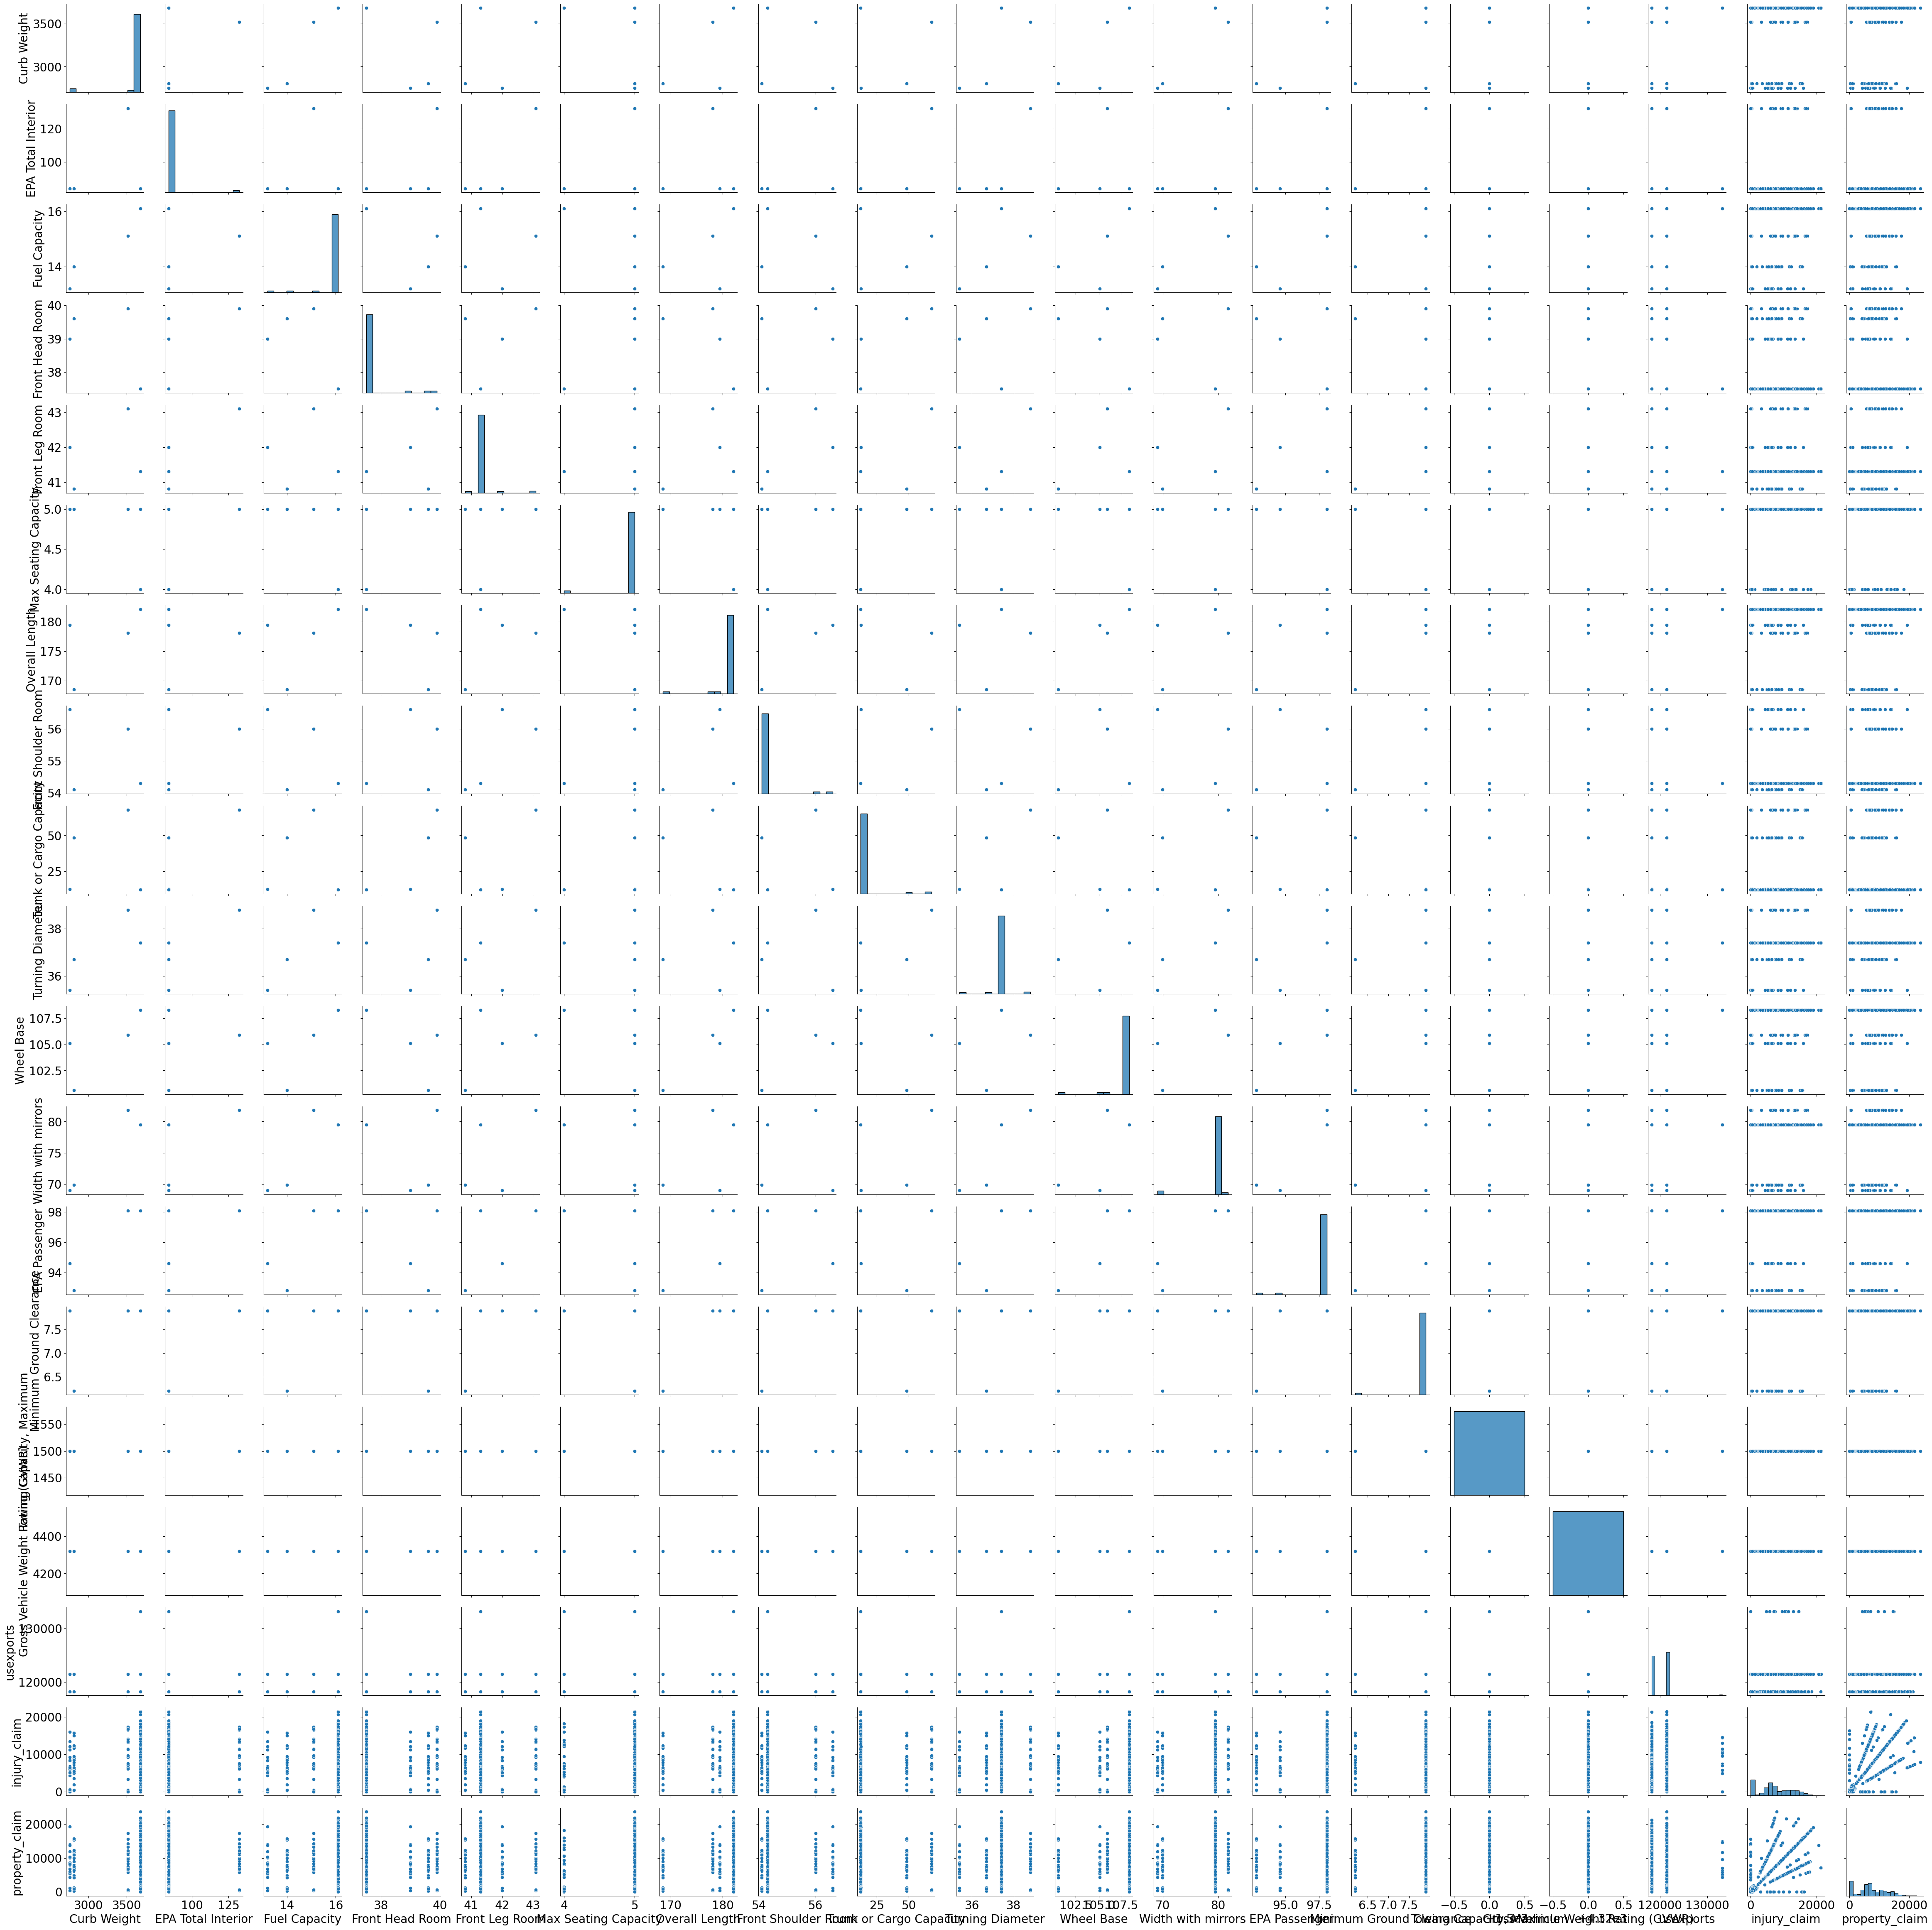

In [646]:
# relationship between car model, usexports and claim amount
# Select the columns of interest
columns_model_usexports = df.iloc[:, 28:45]  # Replace the indices if needed
columns_claim_amount = df.iloc[:, 21:23]  # Replace the indices if needed

# Concatenate the columns into a single DataFrame
selected_columns = pd.concat([columns_model_usexports, columns_claim_amount], axis=1)

# Compute the correlation matrix
correlation_matrix = selected_columns.corr()

# Generate the scatter plot matrix
sns.pairplot(selected_columns)

# Display the plot
plt.show()


Fig5: scatter plot of vehicle characteristics and vehicle claim amount

In [647]:
df.to_csv('claim_all.csv', index=False)

In [5]:
# drop the vehicle model related columns and exports amount data
df.drop(df.columns[28:45], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# 5. Analysis 

## 5.1 Relationship Between Client, Incident, Vehicle, and Claim Amount

To analyze the relationship between client, incident, vehicle and the claim amount, visualized boxplots is used at first, then ANOVA method is applied to get the statistical significance of each variable. 

### 5.1.1	Visualized Boxplots

In [559]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [560]:
y = y.map({'Y': 1, 'N': 0})    # Use map() to replace 'Y' with 1 and 'N' with 0

In [561]:
# Split columns into numerical and categorical
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [572]:
len(cat_cols)

13

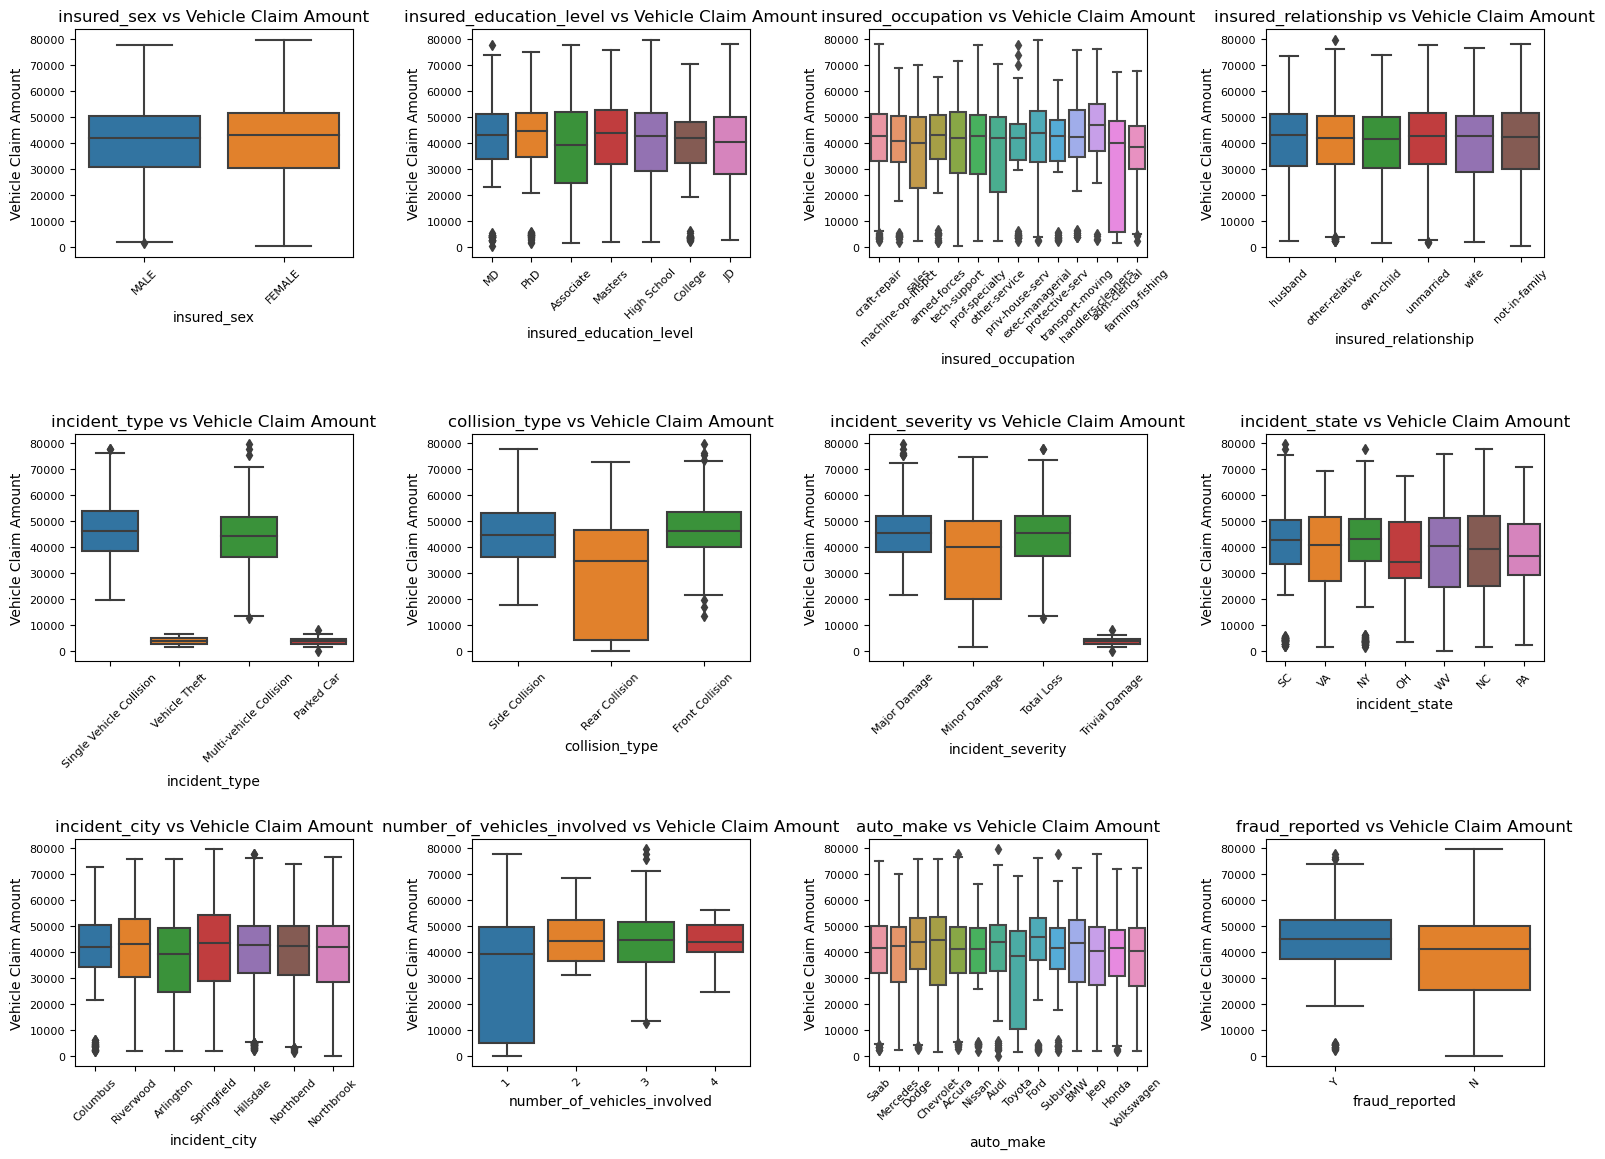

In [577]:
# visualize the relationship between categorical variables "insured_sex, insured_education_level, insured_occupation, insured_hobbies,incident_type, collision_type, number_of_vehicles_involved, auto_make" and "total_claim_amount"
# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each categorical variable and create box plots
for i, cat_var in enumerate(['insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship',
                             'incident_type', 'collision_type', 'incident_severity','incident_state','incident_city',
                             'number_of_vehicles_involved', 'auto_make','fraud_reported']):
    # Create box plot
    sns.boxplot(x=cat_var, y='vehicle_claim', data=df, ax=axes[i])
    axes[i].set_title(f'{cat_var} vs Vehicle Claim Amount', fontsize=12)  # Adjust title font size
    axes[i].set_xlabel(cat_var, fontsize=10)  # Adjust x-axis label font size
    axes[i].set_ylabel('Vehicle Claim Amount', fontsize=10)  # Adjust y-axis label font size
    
        # Adjust x-axis tick label font size
    axes[i].tick_params(axis='x', labelsize=8, labelrotation=45)
    # Adjust y-axis tick label font size
    axes[i].tick_params(axis='y', labelsize=8)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Fig6: boxplots of client, incident, vehicle variables and vehicle claim amount

#### Insured Sex:
The boxplot comparing insured sex indicate that male and female have a similar range of vehicle claim amount, but the median claim amount for females appears to be slightly higher than that for males. The spread of claim amounts, as indicated by the interquartile range, is similar for both sexes.There are some outliers observed in the male group.

#### Insured Education Level:
The subplot analyzing insured education level shows some variability in claim amounts among different education levels. Higher education levels, such as MD, phD, and Masters tend to have higher median claim amounts except Associate.The spread of claim amounts appears to be slightly different across education levels, with Associate and JD existing wider spreads.

#### Insured Occupation:
The subplot comparing insured occupation illustrates distinct differences in claim amounts across various occupations. The median claim amount for transport moving is notably higher compared to other occupations. Some occupations, such as handlers cleaners, prof-specialty and machine operator, exhibit wider spreads in claim amounts. A few outliers are observed in certain occupations, indicating unusually high claim amounts.

#### Insured Relationship:
The subplot comparing insured relationship shows that the median claim amount appears to be relatively consistent across married individuals and single individuals. The spread of claim amounts is relatively similar across the different relationship categories. No significant outliers are observed within married groups.

#### Incident Type:
The subplot comparing incident types reveals that the median claim amount for incidents involving single vehicle collision and multi-vehicle collision appear to be higher than other incident types. Outliers are observed in these two categories. Incidents categorized as vehicle theft and parked car show a extremely narrow spread  and low median claim amounts.

#### Collision Type:
The subplot analyzing collision types indicates that accidents involving side collisions and front collisions have a higher median claim amount compared to rear collision types. There are a few outliers in front collision category.

#### Incident State:
The subplot analyzing incident states reveals that the median claim amount for accidents occurring in State NY is higher compared to incidents in other states. The spread of claim amounts appears similar across the different states.

#### Number of Vehicles Involved:
The subplot examining the number of vehicles involved illustrates that as the number of vehicles involved increases, the median claim amount for incidents generally tends to rise. The spread of claim amounts widens for incidents involving only one vehicle.

#### Auto make:
The subplot analyzing auto make reveals that Ford has the highest median vehicle claim amount, while Toyota has the lowest. The spread of Toyota is extremely wider than the others.


### 5.1.2 Statistical Significance

To get the statistical significance of each variable with vehicle claim amount, ANOVA method is applied then. We can see that incident state has a relatively small p-value with 0.07, so this is statistically significant factor to vehicle claim amount.

In [579]:
import scipy.stats as stats
import pandas as pd

# Create a DataFrame containing the categorical and numerical variables
data = pd.DataFrame({
    'insured_sex': df['insured_sex'],
    'insured_education_level': df['insured_education_level'],
    'insured_occupation': df['insured_occupation'],
    'insured_relationship': df['insured_relationship'],
    'incident_type': df['incident_type'],
    'collision_type': df['collision_type'],
    'incident_severity': df['incident_severity'],
    'incident_state': df['incident_state'],
    'incident_city': df['incident_city'],
    'number_of_vehicles_involved': df['number_of_vehicles_involved'],
    'auto_make': df['auto_make'],
    'fraud_reported': df['fraud_reported'],
    'vehicle_claim': df['vehicle_claim']
})

# Perform ANOVA for each categorical variable
categorical_vars = ['insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship',
                    'incident_type', 'collision_type', 'incident_severity', 'incident_state', 'incident_city',
                    'number_of_vehicles_involved', 'auto_make', 'fraud_reported']
for var in categorical_vars:
    group_means = data.groupby(var)['vehicle_claim'].mean()
    f_value, p_value = stats.f_oneway(*[group for _, group in data.groupby(var)['vehicle_claim']])
    
    print(f"ANOVA results for {var}:")
    print(f"F-value: {f_value}")
    print(f"P-value: {p_value}")
    print("")

ANOVA results for insured_sex:
F-value: 0.875696977207696
P-value: 0.34960933340469025

ANOVA results for insured_education_level:
F-value: 0.9636018881371446
P-value: 0.44869343804725736

ANOVA results for insured_occupation:
F-value: 1.435823791656362
P-value: 0.1362368261275542

ANOVA results for insured_relationship:
F-value: 0.12375243013487176
P-value: 0.9870929081865191

ANOVA results for incident_type:
F-value: 799.1280453860251
P-value: 1.5996814136645183e-264

ANOVA results for collision_type:
F-value: 125.2016138865648
P-value: 3.091113603679973e-49

ANOVA results for incident_severity:
F-value: 211.0676314582867
P-value: 5.839527190472673e-106

ANOVA results for incident_state:
F-value: 1.893772156951998
P-value: 0.0789525757866026

ANOVA results for incident_city:
F-value: 0.7776014204347284
P-value: 0.5875649261477116

ANOVA results for number_of_vehicles_involved:
F-value: 28.342099833937688
P-value: 1.37075243958813e-17

ANOVA results for auto_make:
F-value: 0.725727900

## 5.2 Fraud Prediction

Before performing these models, it is necessary to check the distribution and outliers. Since outliers are present in some numerical columns, I standardize the numerical variables and meanwhile encode the categorical variables. 

Four machine learning algorithms are conducted to predict auto insurance claim fraud, namely Decision Tree, Logistic Regression, Neural Network and Supported Vector Machine (SVM). 

Decision Tree is a simple yet powerful supervised learning model used for classification and regression tasks. 

Logistic Regression is a widely-used statistical model to evaluate the relationship between input features and the probability of an event.

Neural Network is a particularly deep learning model, excels at identifying complex patterns and relationships within the data. 

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is particularly effective in solving complex problems where there is a clear separation between classes or patterns in the data. Overall, all of these methods are suitable for predicting categorical target variable.

After running the models, the evaluation metrics show that logistic regression performs the best with a misclassification rate of 0.24, recall of 0.37, specificity of 0.89, and precision of 0.52.


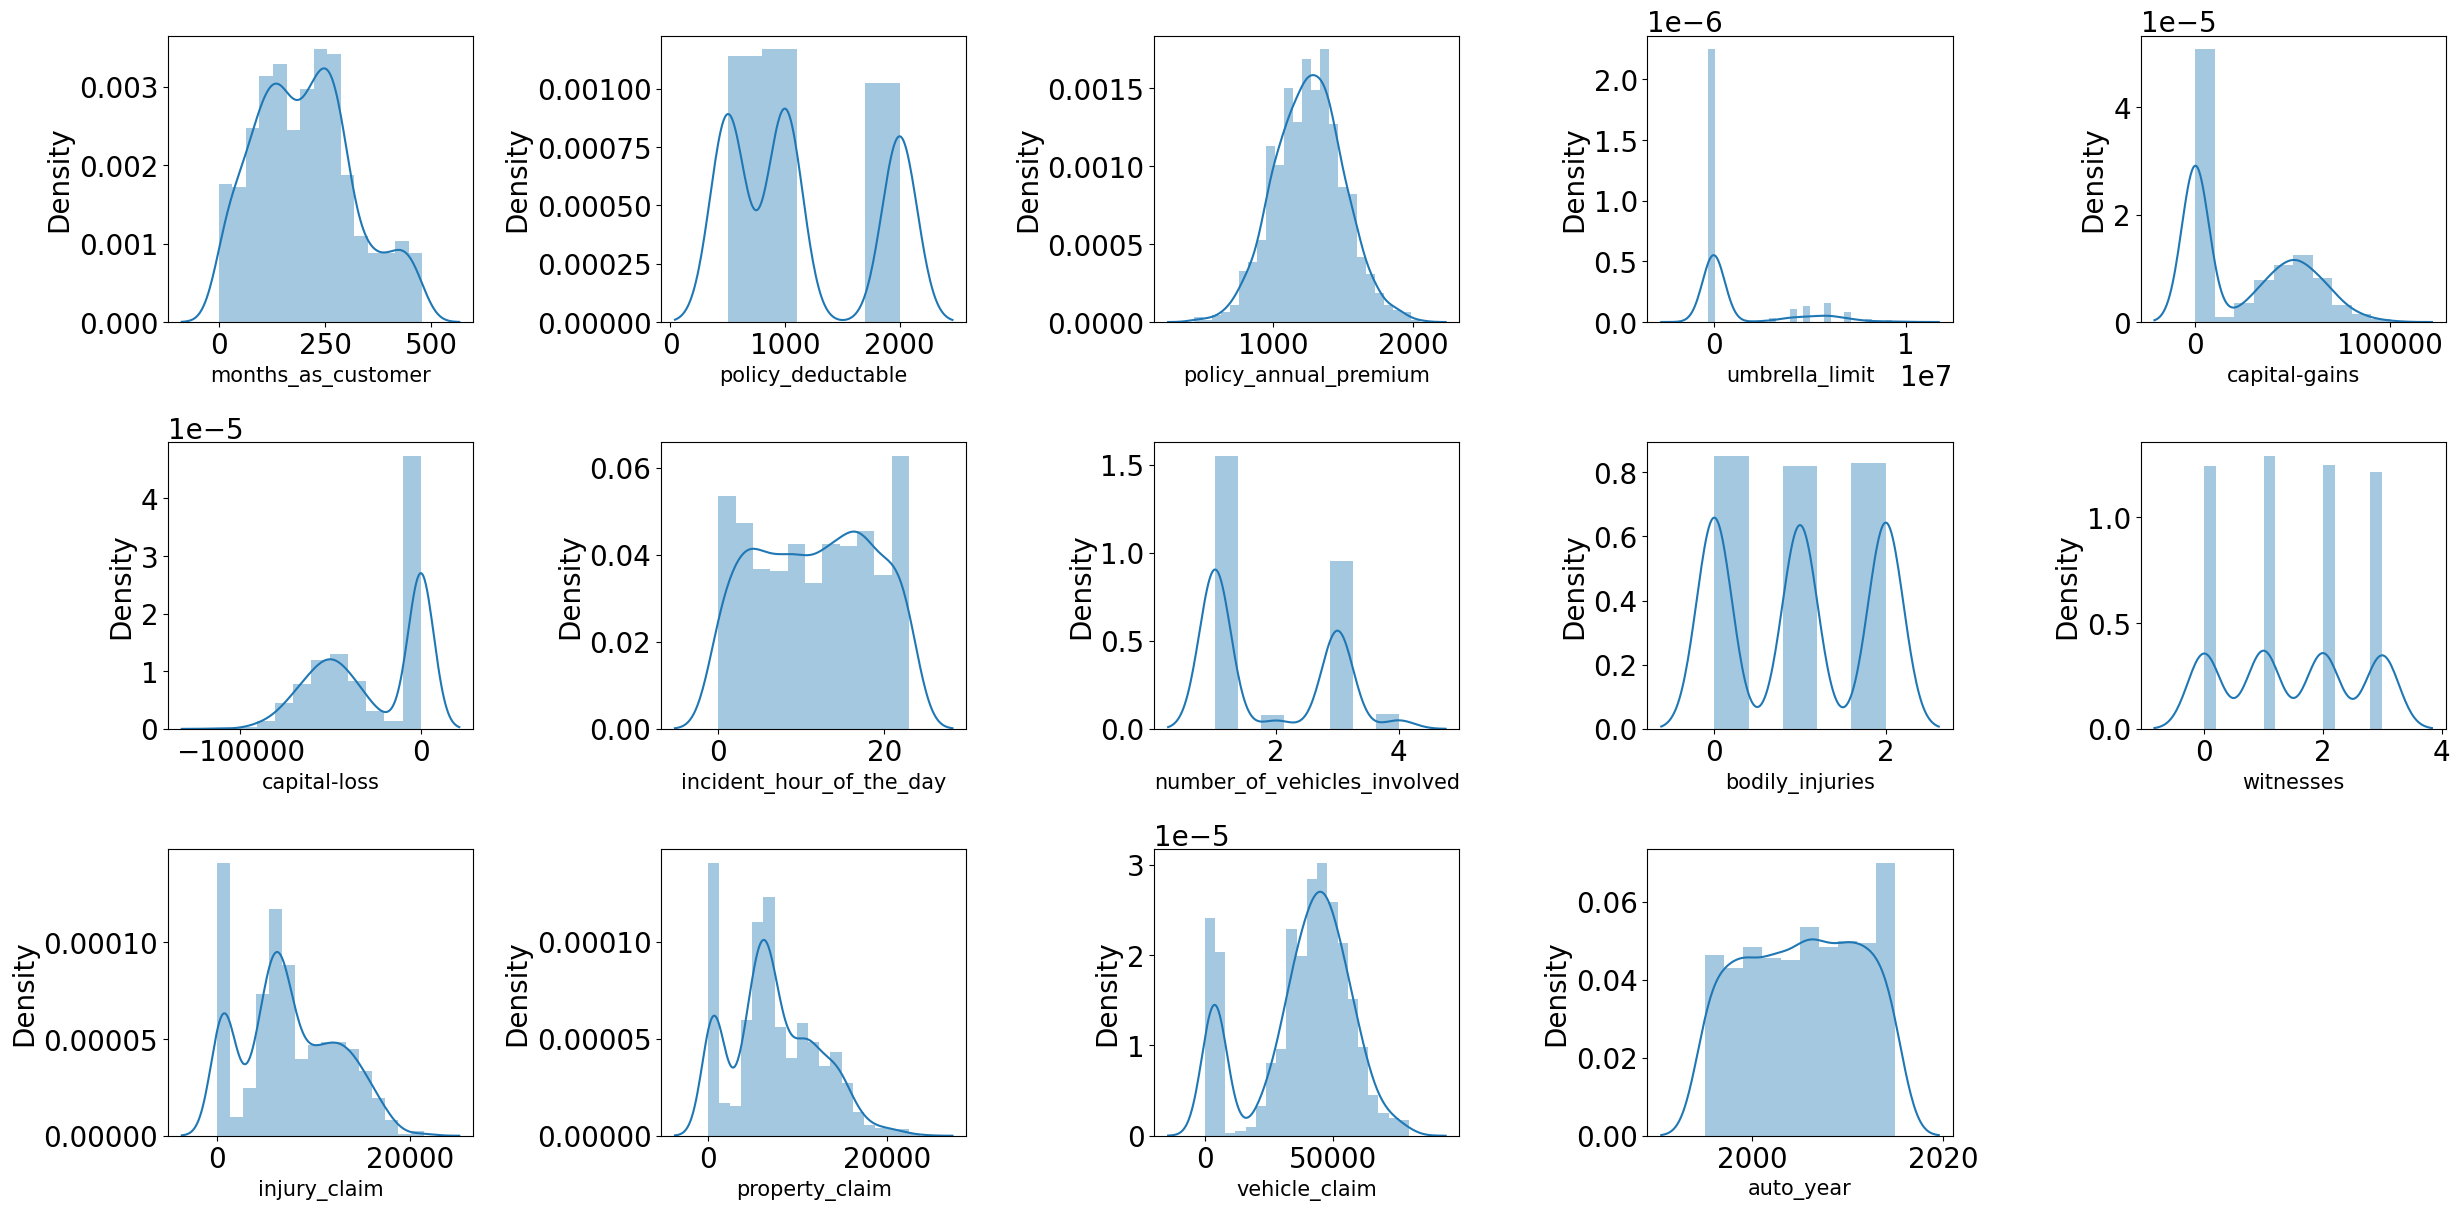

In [562]:
# check the distribution
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Fig7: distributions of numerical variables

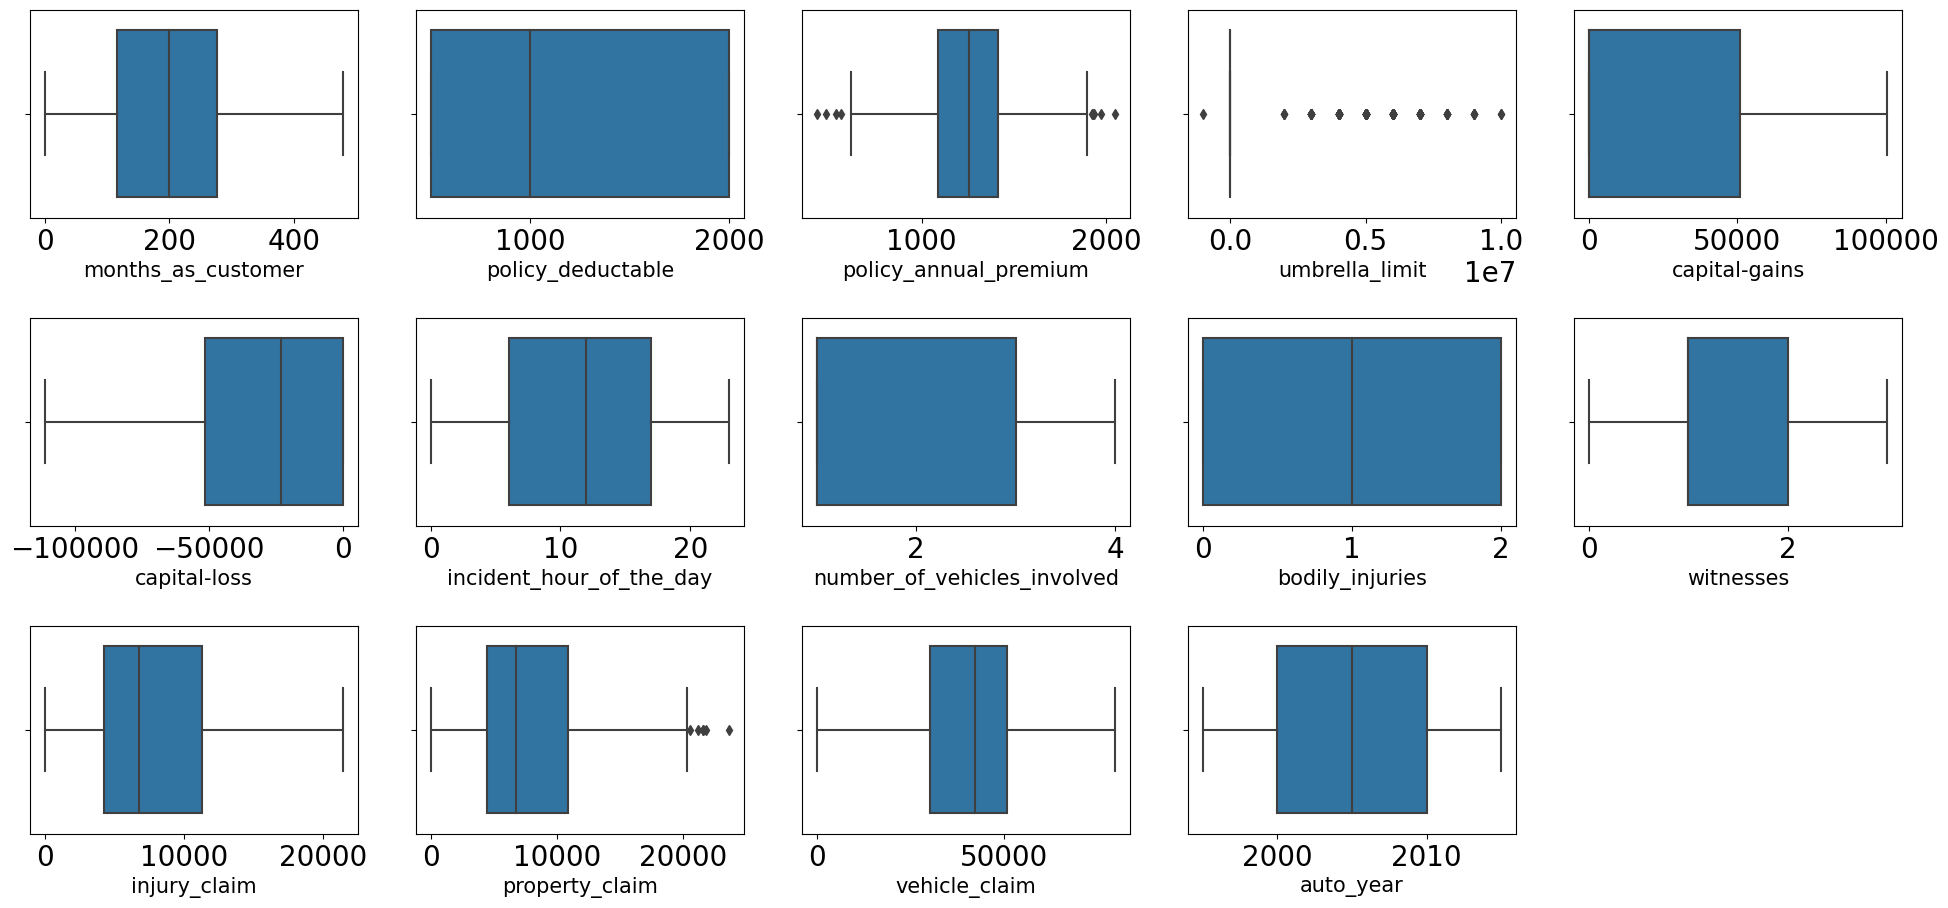

In [563]:
# detect outliers
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Fig8: boxplot of numerical variables

In [580]:
# data preprocessings
from sklearn.preprocessing import StandardScaler

def scale_and_encode(df):
    # Split columns into numerical and categorical
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Standardize numerical columns
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    # One-hot encode categorical columns
    df = pd.get_dummies(df, columns=cat_cols,drop_first = True)
    
    return df

In [581]:
X = scale_and_encode(X)
X.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1.078140,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,1.165505,0.749653,-0.183440,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.208995,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,-1.372696,-1.823346,0.315491,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.608002,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,-0.736072,-0.785565,0.315491,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.452355,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,-0.224130,-0.219722,0.677607,1.479664,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.208995,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,-1.399654,-1.768252,0.648112,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [582]:
# modelling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [584]:
# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Logistic Regression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
lg_pred = lg_model.predict(X_val)
lg_accuracy = accuracy_score(y_val, lg_pred)
lg_precision = precision_score(y_val, lg_pred)
lg_recall = recall_score(y_val, lg_pred)
lg_cm = confusion_matrix(y_val, lg_pred)
lg_specificity = lg_cm[0, 0] / (lg_cm[0, 0] + lg_cm[0, 1])

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_val)
dt_accuracy = accuracy_score(y_val, dt_pred)
dt_precision = precision_score(y_val, dt_pred)
dt_recall = recall_score(y_val, dt_pred)
dt_cm = confusion_matrix(y_val, dt_pred)
dt_specificity = dt_cm[0, 0] / (dt_cm[0, 0] + dt_cm[0, 1])

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_val)
svm_accuracy = accuracy_score(y_val, svm_pred)
svm_precision = precision_score(y_val, svm_pred)
svm_recall = recall_score(y_val, svm_pred)
svm_cm = confusion_matrix(y_val, svm_pred)
svm_specificity = svm_cm[0, 0] / (svm_cm[0, 0] + svm_cm[0, 1])

# Neural Network
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_val)
nn_accuracy = accuracy_score(y_val, nn_pred)
nn_precision = precision_score(y_val, nn_pred)
nn_recall = recall_score(y_val, nn_pred)
nn_cm = confusion_matrix(y_val, nn_pred)
nn_specificity = nn_cm[0, 0] / (nn_cm[0, 0] + nn_cm[0, 1])

# Print the results
print("Logistic Regression:")
print("Misclassification rate:", 1 - lg_accuracy)
print("Recall:", lg_recall)
print("Specificity:", lg_specificity)
print("Precision:", lg_precision)
print("")

print("Decision Tree:")
print("Misclassification rate:", 1 - dt_accuracy)
print("Recall:", dt_recall)
print("Specificity:", dt_specificity)
print("Precision:", dt_precision)
print("")

print("Support Vector Machine:")
print("Misclassification rate:", 1 - svm_accuracy)
print("Recall:", svm_recall)
print("Specificity:", svm_specificity)
print("Precision:", svm_precision)
print("")

print("Neural Network:")
print("Misclassification rate:", 1 - nn_accuracy)
print("Recall:", nn_recall)
print("Specificity:", nn_specificity)
print("Precision:", nn_precision)
print("")

Logistic Regression:
Misclassification rate: 0.235
Recall: 0.3711340206185567
Specificity: 0.8910891089108911
Precision: 0.5217391304347826

Decision Tree:
Misclassification rate: 0.2975
Recall: 0.35051546391752575
Specificity: 0.8151815181518152
Precision: 0.37777777777777777

Support Vector Machine:
Misclassification rate: 0.24
Recall: 0.010309278350515464
Specificity: 1.0
Precision: 1.0

Neural Network:
Misclassification rate: 0.245
Recall: 0.25773195876288657
Specificity: 0.9141914191419142
Precision: 0.49019607843137253



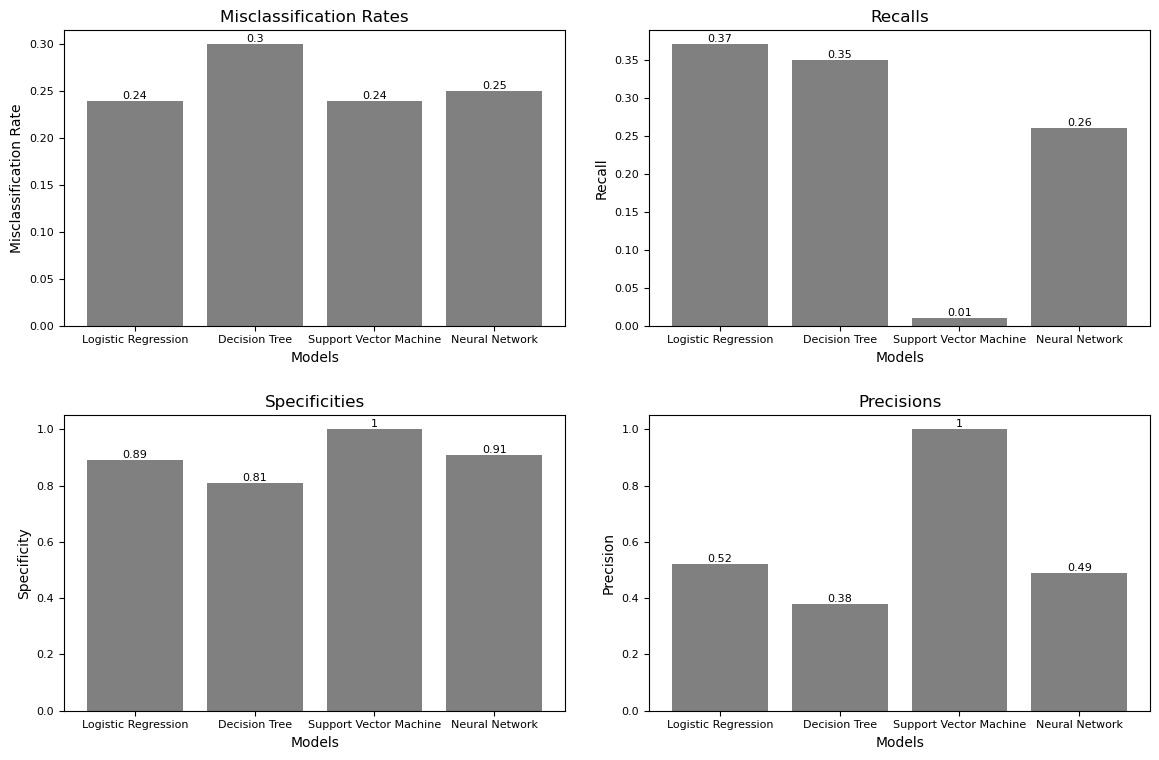

In [589]:
import matplotlib.pyplot as plt

# Store the performance metrics
models = ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Neural Network']
misclassification_rates = [0.24, 0.30, 0.24, 0.25]
recalls = [0.37, 0.35, 0.01, 0.26]
specificities = [0.89, 0.81, 1, 0.91]
precisions = [0.52, 0.38, 1, 0.49]

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot the misclassification rates
axes[0, 0].bar(models, misclassification_rates, color='grey')
axes[0, 0].set_title('Misclassification Rates', fontsize=12)
axes[0, 0].set_xlabel('Models', fontsize=10)
axes[0, 0].set_ylabel('Misclassification Rate', fontsize=10)
axes[0, 0].tick_params(axis='both', which='major', labelsize=8)
for i, val in enumerate(misclassification_rates):
    axes[0, 0].text(i, val, str(val), ha='center', va='bottom', fontsize=8)

# Plot the recalls
axes[0, 1].bar(models, recalls, color='grey')
axes[0, 1].set_title('Recalls', fontsize=12)
axes[0, 1].set_xlabel('Models', fontsize=10)
axes[0, 1].set_ylabel('Recall', fontsize=10)
axes[0, 1].tick_params(axis='both', which='major', labelsize=8)
for i, val in enumerate(recalls):
    axes[0, 1].text(i, val, str(val), ha='center', va='bottom', fontsize=8)

# Plot the specificities
axes[1, 0].bar(models, specificities, color='grey')
axes[1, 0].set_title('Specificities', fontsize=12)
axes[1, 0].set_xlabel('Models', fontsize=10)
axes[1, 0].set_ylabel('Specificity', fontsize=10)
axes[1, 0].tick_params(axis='both', which='major', labelsize=8)
for i, val in enumerate(specificities):
    axes[1, 0].text(i, val, str(val), ha='center', va='bottom', fontsize=8)

# Plot the precisions
axes[1, 1].bar(models, precisions, color='grey')
axes[1, 1].set_title('Precisions', fontsize=12)
axes[1, 1].set_xlabel('Models', fontsize=10)
axes[1, 1].set_ylabel('Precision', fontsize=10)
axes[1, 1].tick_params(axis='both', which='major', labelsize=8)
for i, val in enumerate(precisions):
    axes[1, 1].text(i, val, str(val), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Fig9: evaluation metrics of Logistic Regression, Decision Tree, Support Vector Machine and Neural Network

# 6. Conclusion 


This study focuses on two aspects of research in the field of automobile insurance claim. Firstly, there is a certain relationship between client information, incident information, vehicle information and vehicle claim amount, but there is no relationship between export amount and vehicle claim amount. Additionally, the study utilizes four machine learning methods to address the prediction of auto insurance claim fraud, as a result, logistic regression turns out to be the best model. 

Although logistic regression is the best, supplementary of data and model’s optimization still need to be considered. Due to the imbalanced dataset with a small percentage of “fraud claims” but much large percentage of “non-fraud claims”, more enhanced hybrid machine learning algorithms should be applied to address this issue of an unbalanced data (Hanafy & Ming, 2021).


# Bibliography

Abdelhadi, S., Elbahnasy, K., & Abdelsalam, M. (2005). A PROPOSED MODEL TO PREDICT AUTO INSURANCE CLAIMS USING MACHINE LEARNING TECHNIQUES. . . Vol., 22.

Benedek, B., Ciumas, C., & Nagy, B. Z. (2022). Automobile insurance fraud detection in the age of big data – a systematic and comprehensive literature review. Journal of Financial Regulation and Compliance, 30(4), 503–523. https://doi.org/10.1108/JFRC-11-2021-0102

Hanafy, M., & Ming, R. (2021). Using machine learning models to compare various resampling methods in predicting insurance fraud. Journal of Theoretical and Applied Information Technology, 99, 2819–2833.

